<a href="https://colab.research.google.com/github/pchernic/regression/blob/main/%5BTime_Series_with_Machine_Learning%5D_%5BXGboost%5D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time Series with Machine Learning.

**Xgboost**

-  ARIMA: We can **SET/DETERMINE** the amount of days for a forecast forward/backward
-  ML: **ONLY ONE**  unit **forward**


# Example


### Libs

In [ ]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


from statsmodels.tsa.arima.model import ARIMA

In [ ]:
!pip install scipy

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.5 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

# Load


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Energy dataset

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Regression/energy.xlsx', index_col='DATE', parse_dates=True)
df.head()

,energy
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


## ARIMA review

In [ ]:
# quantas linhas e colunas?
df.shape

(408, 1)

In [ ]:
# Estatística descritiva
df.describe()

,energy
count,408.000000
mean,88.062232
std,15.168540
min,54.616500
25%,76.499750
50%,88.940450
75%,99.733200
max,126.362600


In [ ]:
# Quando começam e terminam os dados?
df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [ ]:
df.columns = ['producao']

<Axes: xlabel='DATE'>

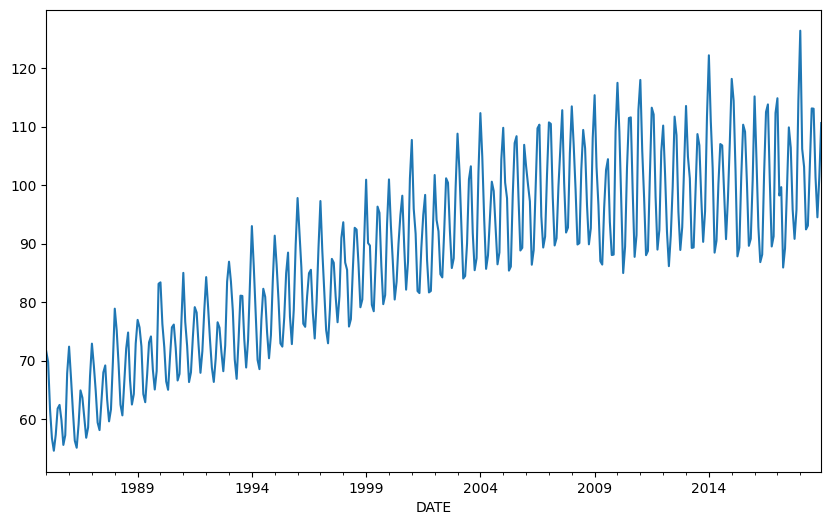

In [ ]:
# Vamos dar uma olhada no gráfico de consumo x anos
df['producao'].plot(figsize=(10,6))


<Figure size 576x432 with 0 Axes>

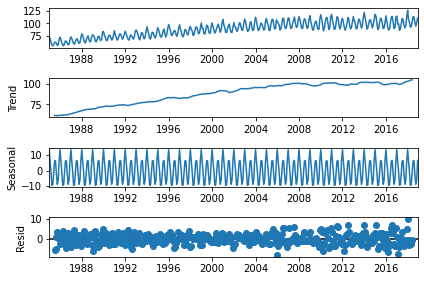

In [ ]:
# Primeiro, vamos decompor a série pra avaliar tendência
# Sazonalidade e resíduo
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(df)

fig = plt.figure(figsize=(8, 6))
fig = resultado.plot()

In [ ]:
# Teste de estacionariedade.
# A hipótese nula é que a série não é estacionária
# Ou seja, se o p-valor for menor que 0,05, rejeitamos
# que a série não é estacionária. Caso seja maior, não podemos
# descartar que a série não é estacionária
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['producao'].dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-2.252399047046584
p-valor:0.18777984601968167


In [ ]:
# Teste de estacionariedade.
# A hipótese nula é que a série não é estacionária
# Ou seja, se o p-valor for menor que 0,05, rejeitamos
# que a série não é estacionária. Caso seja maior, não podemos
# descartar que a série não é estacionária
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['producao'].diff().dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-7.450892277526348
p-valor:5.6745699558553634e-11


In [ ]:
# Auto ARIMA nos ajuda a buscar os melhores parâmetros
fit_arima = auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=True,
                           m=6,
                           D=1,
                           start_P=1,
                           start_Q=1,
                           max_P=2,
                           max_Q=2,
                           information_criterion='aic',
                           trace=True,
                           error_action='ignore',
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1968.148, Time=0.92 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2494.965, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=2053.701, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2128.799, Time=0.65 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=2064.883, Time=1.46 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=1.36 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1928.298, Time=2.92 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=2.04 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=1868.200, Time=5.08 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=1866.400, Time=4.37 sec
 ARIMA(1,1,1)(0,1,2)[6]             : AIC=2014.153, Time=2.11 sec
 ARIMA(0,1,1)(1,1,2)[6]             : AIC=1916.488, Time=2.82 sec
 ARIMA(1,1,0)(1,1,2)[6]             : AIC=1936.850, Time=2.94 sec
 ARIMA(2,1,1)(1,1,2)[6]             : AIC=1868.120, Time=6.23 sec
 ARIMA(1,1,2)(1,1,2)[6]             : AIC=1

In [ ]:
# Agora que sabemos os melhores parâmetros, vamos criar um modelo SARIMAX
# (versão do arima com parametros para sazonalidade)

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df,order=(1,1,1),  seasonal_order=(1, 1, 2, 6))
resultado_sarimax = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# resultados do modelo SARIMAX(2,1,2)
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               producao   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -927.200
Date:                                Thu, 20 Oct 2022   AIC                           1866.400
Time:                                        19:35:23   BIC                           1890.364
Sample:                                    01-01-1985   HQIC                          1875.889
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.042     12.156      0.000       0.430       0.595
ma.L1         -0.9601      0.017    -56.250      0.000      -0.994      -0.927
ar.S.L6       -0.9973      0.003   -350.065      0.000      -1.003      -0.992
ma.S.L6        0.1026      0.037      2.775      0.006       0.030       0.175
ma.S.L12      -0.7748      0.035    -22.181      0.000      -0.843      -0.706
sigma2         5.6413      0.322     17.544      0.000       5.011       6.272
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                29.17
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Vamos realizar um "backtesting" com predições de valores dos 12 meses anteriores
predicoes = resultado_sarimax.get_prediction(start=-12)
predicao_media = predicoes.predicted_mean

In [ ]:
# intervalo de confiança

intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], limites_acima[0]

(115.14474825026089, 124.45517746431635)

In [ ]:
predicao_media[0]

119.79996285728862

In [ ]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

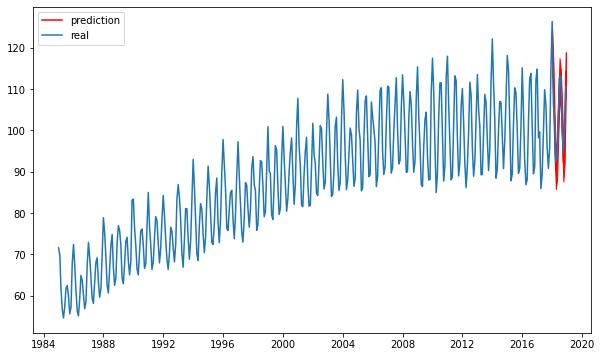

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(datas_previsao,predicao_media.values,color='red',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red')
plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_sarima = sqrt(mean_squared_error(df[-12:].values,predicao_media.values))
print(rmse_sarima)

3.4262789603631325


##FORECAST COM ARIMA

In [ ]:
# Forecast pra 12 values

forecast = resultado_sarimax.get_forecast(steps=12)
forecast_medio = forecast.predicted_mean
forecast_medio.size

12

In [ ]:

intervalo_confianca_forecast = forecast.conf_int()
intervalo_abaixo_f = intervalo_confianca_forecast.iloc[:,0]
intervalo_acima_f = intervalo_confianca_forecast.iloc[:,1]

intervalo_abaixo_f[10], intervalo_acima_f[10]

(91.38813221555213, 103.10930917451398)

In [ ]:
forecast_medio[10]

97.24872069503306

In [ ]:
datas_forecast = np.asarray(forecast_medio.index)
pred_dates=np.asarray(predicao_media.index)

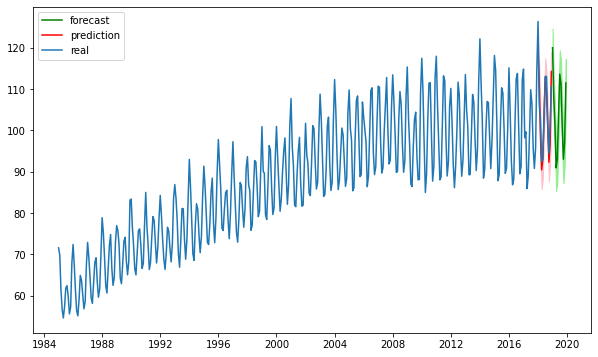

In [ ]:

dates=np.asarray(df.index)
plt.figure(figsize=(10,6))
plt.plot(datas_forecast,forecast_medio.values,color='green',label='forecast')
plt.fill_between(datas_forecast, intervalo_abaixo_f, intervalo_acima_f, color='lightgreen')

plt.plot(datas_previsao,predicao_media.values,color='red',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='pink')

plt.plot(dates,df.values, label='real')
plt.legend(loc='upper left')
plt.show()

#XGboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
treino = df.loc[df.index < "2016-12-31"]
validacao = df.loc[df.index > "2016-12-31"]

treino.shape, validacao.shape

((384, 1), (24, 1))

In [ ]:
treino.head()

,producao
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


### Target.

shift - brings a result upwards.
-1, move one square forward.

In [ ]:
treino["target"] = treino["producao"].shift(-1)
treino.head()

<ipython-input-15-1f6b0df3518f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino["target"] = treino["producao"].shift(-1)


,producao,target
DATE,,
1985-01-01,71.5920,69.7870
1985-02-01,69.7870,61.6790
1985-03-01,61.6790,56.7479
1985-04-01,56.7479,54.6165
1985-05-01,54.6165,57.3509


In [ ]:
treino.dropna(inplace=True)

<ipython-input-16-b8dd0b7f87ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino.dropna(inplace=True)


In [ ]:
validacao["target"] = validacao["producao"].shift(-1)
validacao.head()

<ipython-input-17-66ef9ff7cc40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao["target"] = validacao["producao"].shift(-1)


,producao,target
DATE,,
2017-01-01,114.8282,98.2191
2017-02-01,98.2191,99.6408
2017-03-01,99.6408,85.9106
2017-04-01,85.9106,89.2053
2017-05-01,89.2053,99.1945


In [ ]:
validacao.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### Train and test settings:


In [ ]:
x_treino = treino.loc[:, ["producao"]].values
y_treino = treino.loc[:, ["target"]].values
x_validacao = validacao.loc[:, ["producao"]].values
y_validacao = validacao.loc[:, ["target"]].values

In [ ]:
modelo_xgba = XGBRegressor()
modelo_xgba.fit(x_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
validacao.iloc[0]

producao    114.8282
target       98.2191
Name: 2017-01-01 00:00:00, dtype: float64

In [ ]:
predicao = modelo_xgba.predict(x_validacao)
predicao

array([103.86972 , 102.7595  , 109.48729 ,  78.83086 ,  92.39584 ,
        92.556015, 101.47449 , 110.37736 ,  95.53983 ,  99.24283 ,
        95.53983 , 102.701965, 111.40189 ,  98.29675 ,  96.66097 ,
        90.28177 ,  87.64868 ,  99.88448 , 111.89654 , 111.89654 ,
       111.14365 ,  97.18245 , 111.14365 , 109.63545 ], dtype=float32)

In [ ]:
validacao["pred"] = predicao
validacao.head()

<ipython-input-22-59e209950550>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao["pred"] = predicao


,producao,target,pred
DATE,,,
2017-01-01,114.8282,98.2191,103.869720
2017-02-01,98.2191,99.6408,102.759499
2017-03-01,99.6408,85.9106,109.487289
2017-04-01,85.9106,89.2053,78.830856
2017-05-01,89.2053,99.1945,92.395844


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(x_validacao, predicao)

5.872536161804199

In [ ]:
validacao['diff'] = validacao['producao'] - validacao['pred']
validacao.head()

<ipython-input-24-25f6eb62ddf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao['diff'] = validacao['producao'] - validacao['pred']


,producao,target,pred,diff
DATE,,,,
2017-01-01,114.8282,98.2191,103.869720,10.958480
2017-02-01,98.2191,99.6408,102.759499,-4.540399
2017-03-01,99.6408,85.9106,109.487289,-9.846489
2017-04-01,85.9106,89.2053,78.830856,7.079744
2017-05-01,89.2053,99.1945,92.395844,-3.190544


In [ ]:
validacao['diff'].mean()

1.5236812281290681

# **Forecasting with ARIMA AND XGboost**
case

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### scipy and arima

In [ ]:
!pip install scipy

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.8 MB/s eta 0:00:00


### Libraries

In [ ]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

### Loading

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Linear Regression/temperature.xlsx',index_col='Date', parse_dates=True)
df

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-02-01,17.9
1981-03-01,18.8
1981-04-01,14.6
1981-05-01,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


#### Basic Checks.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3647 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily minimum temperatures  3647 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [ ]:
df.shape

(3647, 1)

### Data Understading.

### Data range

In [ ]:
df.index.min(), df.index.max()

(Timestamp('1981-01-01 00:00:00'), Timestamp('1990-12-31 00:00:00'))

In [ ]:
df['Daily minimum temperatures'].max(), df['Daily minimum temperatures'].min()

(26.3, 0.0)

#### Visualization

<Axes: xlabel='Date'>

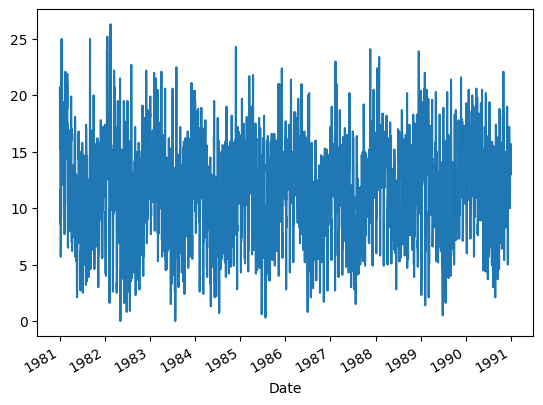

In [ ]:
df['Daily minimum temperatures'].plot()

### Sorting index.

In [ ]:
df.sort_index(inplace=True)

### Series decompose
Statsmodel.tsa.seasonal


<Figure size 1000x900 with 0 Axes>

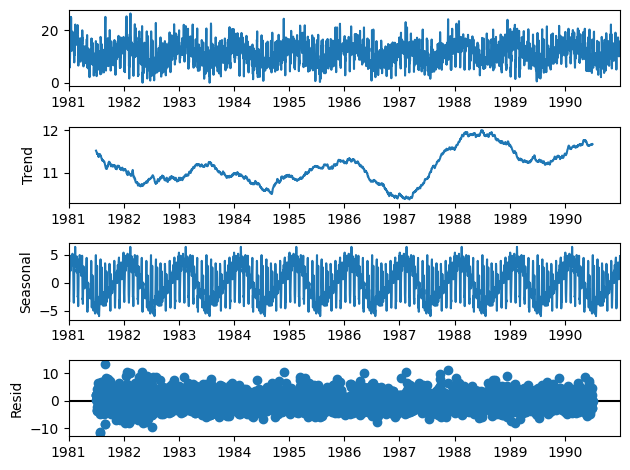

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='add', period=365)

fig = plt.figure(figsize=(10,9))
fig = result.plot()

#### Stationarity test

- NH: Nule hypotesis is : **it ISN'T stationary**
- Hence:  **p-value < 0.05**
- In case p-value > 0.05 = **It's stationary**. / **NH rejected**


In [ ]:
from statsmodels.tsa.stattools import adfuller #adf test

outcome = adfuller(df['Daily minimum temperatures'].dropna())


In [ ]:
print(f'ADF test: {outcome[0]}')
print(f'p-value: {outcome[1]}')

ADF test: -3.331541412968857
p-value: 0.01352611219545271


###NOTICE that:

We have p-value lower than 0.05 so we can't reject NH, hence,  **IT IS A STATIONARY  series.**

## **AUTO ARIMA:**  Best parameters selection with AUTO ARIMA

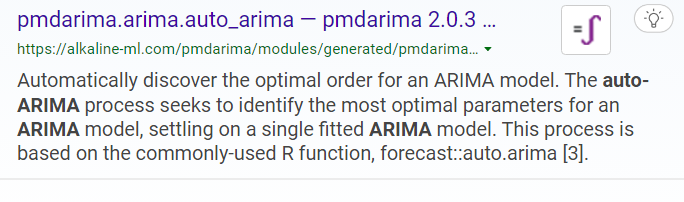

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:

fit_arima = auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=True,
                           m=6,
                           D=1,
                           start_P=1,
                           start_Q=1,
                           max_P=2,
                           max_Q=2,
                           information_criterion='aic',
                           trace=True,
                           error_action='ignore',
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=inf, Time=21.32 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=22211.573, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=20978.709, Time=1.13 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=8.00 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=22068.931, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=20482.431, Time=1.09 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=16.18 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=8.29 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=20662.364, Time=2.42 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=20418.687, Time=3.26 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=20927.151, Time=1.75 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=19.16 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=11.07 sec
 ARIMA(3,1,0)(2,1,0)[6]             : AIC=20352.684, Time=2.48 sec
 ARIMA(3,1,0)(1,1,0)[6]             : AIC=20872.994

## SARIMAX modeling.

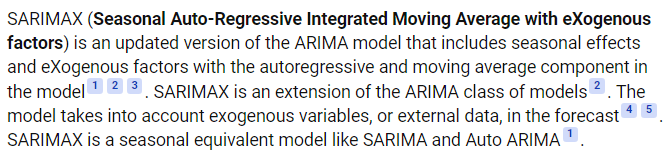

##### SARIMAX FIT

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df, order=(3,1,0))
result_sarimax = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### SARIMAX SUMMARY

In [ ]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     Daily minimum temperatures   No. Observations:                 3647
Model:                       SARIMAX(3, 1, 0)   Log Likelihood               -9612.137
Date:                        Mon, 17 Jul 2023   AIC                          19232.275
Time:                                15:14:15   BIC                          19257.080
Sample:                                     0   HQIC                         19241.109
                                       - 3647                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2906      0.015    -19.257      0.000      -0.320      -0.261
ar.L2         -0.1721      0.015    -11.262      0.000      -0.202      -0.142
ar.L3         -0.1215      0.016     -7.719      0.000      -0.152      -0.091
sigma2        11.4141      0.224     51.061      0.000      10.976      11.852
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):               117.31
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Backtesting:

In [ ]:
pred = result_sarimax.get_prediction(start=-60)
pred_avg= pred.predicted_mean

Confidence interval

In [ ]:
c_i = pred.conf_int()
c_i_bottom = c_i .iloc[:,0]
c_i_top = c_i .iloc[:,1]

c_i_bottom[0], c_i_top[0]

(13.215902333969314, 26.45930394097881)

Avereage Prediction

In [ ]:
pred_avg[0]

19.837603137474062

In [ ]:
dates_pred = np.asarray(pred_avg.index)
dates = np.asarray(df.index)

#### Prediction Visualization

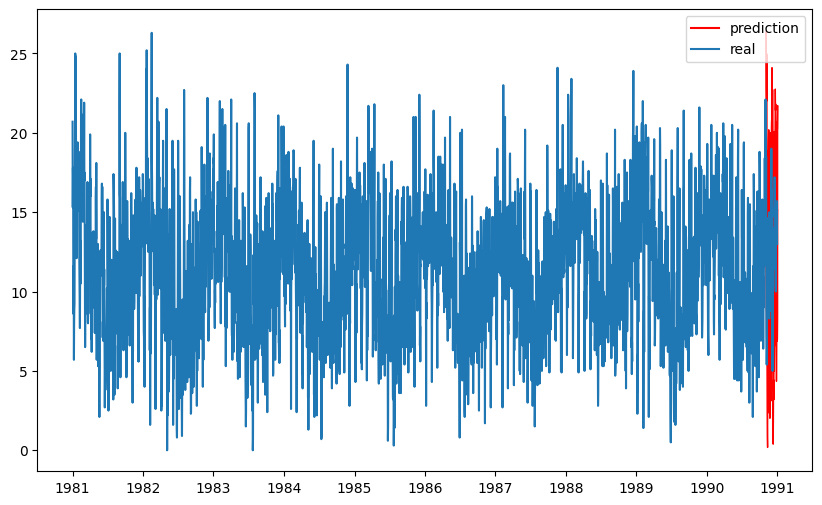

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(dates_pred,pred_avg.values,color='red',label='prediction')
plt.fill_between(dates_pred, c_i_bottom, c_i_top, color='red')
plt.plot(dates, df.values, label='real')
plt.legend()
plt.show()

### Arima Prediction Metrics

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_sarima = sqrt(mean_squared_error(df[-60:].values,pred_avg.values))
print(rmse_sarima)

3.012457329818421


## XGboost prediction
Machine Learning.
- limited by being only capable of predicting a **single unit and only forward**

-  shift(-1)

### Lib

In [ ]:
from xgboost import XGBRegressor

### Train and test settings:

In [ ]:
train = df.loc[df.index <= '1988-12-31']
validation = df.loc[df.index > '1989-01-01']

train.shape, validation.shape

((2917, 1), (729, 1))

### Train and test settings:

## Data Range

In [ ]:
train.index.min(), train.index.max()

(Timestamp('1981-01-01 00:00:00'), Timestamp('1988-12-30 00:00:00'))

In [ ]:
train['Daily minimum temperatures']

Date
1981-01-01    20.7
1981-02-01    17.9
1981-03-01    18.8
1981-04-01    14.6
1981-05-01    15.8
              ... 
1988-12-26     9.5
1988-12-27    12.9
1988-12-28    12.9
1988-12-29    14.8
1988-12-30    14.1
Name: Daily minimum temperatures, Length: 2917, dtype: float64

In [ ]:
train['Daily minimum temperatures'].shift(-1)

Date
1981-01-01    17.9
1981-02-01    18.8
1981-03-01    14.6
1981-04-01    15.8
1981-05-01    15.8
              ... 
1988-12-26    12.9
1988-12-27    12.9
1988-12-28    14.8
1988-12-29    14.1
1988-12-30     NaN
Name: Daily minimum temperatures, Length: 2917, dtype: float64

In [ ]:
train['target'] = train['Daily minimum temperatures'].shift(-1)
train.head()

<ipython-input-86-bf34885ca6a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['target'] = train['Daily minimum temperatures'].shift(-1)


,Daily minimum temperatures,target
Date,,
1981-01-01,20.7,17.9
1981-02-01,17.9,18.8
1981-03-01,18.8,14.6
1981-04-01,14.6,15.8
1981-05-01,15.8,15.8


In [ ]:
train = train.dropna()

In [ ]:
validation['target'] = validation['Daily minimum temperatures'].shift(-1)
validation.head()

<ipython-input-88-3d290a90005e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['target'] = validation['Daily minimum temperatures'].shift(-1)


,Daily minimum temperatures,target
Date,,
1989-02-01,17.4,18.5
1989-03-01,18.5,16.8
1989-04-01,16.8,11.5
1989-05-01,11.5,9.5
1989-06-01,9.5,12.2


##Train

In [ ]:
X_train = train.loc[:, ['Daily minimum temperatures']].values
y_train = train.loc[:, ['target']].values
X_validation = validation.loc[:, ['Daily minimum temperatures']].values
y_validation = validation.loc[:, ['target']].values

X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((2916, 1), (2916, 1), (729, 1), (729, 1))

####XGB Modeling

In [ ]:
model_xgba = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
model_xgba.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
validation.iloc[0]

Daily minimum temperatures    17.4
target                        18.5
Name: 1989-02-01 00:00:00, dtype: float64

In [ ]:
prediction = model_xgba.predict(X_validation)
prediction

In [ ]:
validation["pred"] = prediction
validation.head()

<ipython-input-93-ebee6ca79f14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["pred"] = prediction


,Daily minimum temperatures,target,pred
Date,,,
1989-02-01,17.4,18.5,16.601343
1989-03-01,18.5,16.8,17.100250
1989-04-01,16.8,11.5,15.164827
1989-05-01,11.5,9.5,10.744409
1989-06-01,9.5,12.2,9.574980


In [ ]:
validation['diff'] = validation['target'] - validation['pred']
validation.head()

<ipython-input-94-5553af0f98ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['diff'] = validation['target'] - validation['pred']


,Daily minimum temperatures,target,pred,diff
Date,,,,
1989-02-01,17.4,18.5,16.601343,1.898657
1989-03-01,18.5,16.8,17.100250,-0.300250
1989-04-01,16.8,11.5,15.164827,-3.664827
1989-05-01,11.5,9.5,10.744409,-1.244409
1989-06-01,9.5,12.2,9.574980,2.625020


In [ ]:
validation['diff'].mean()

-0.04283207664777946

### XGBoost Metrics

In [ ]:
mean_squared_error(X_validation, prediction)

1.4462169950166421

## Gabarito


###  Arima and Sarimax

In [ ]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


from statsmodels.tsa.arima.model import ARIMA

In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
# vamos importar a base de produção de energia elétrica
df = pd.read_excel('temperature.xlsx', index_col='Date', parse_dates=True)
df.head()

,Daily minimum temperatures
Date,
1981-01-01,21
1981-02-01,18
1981-03-01,19
1981-04-01,15
1981-05-01,16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3647 entries, 1981-01-01 00:00:00 to 12/31/1990
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Daily minimum temperatures  3647 non-null   int64
dtypes: int64(1)
memory usage: 57.0+ KB


In [ ]:

df['Daily minimum temperatures'] = df['Daily minimum temperatures'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3647 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily minimum temperatures  3647 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [ ]:
df.head

,Date,Daily minimum temperatures
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


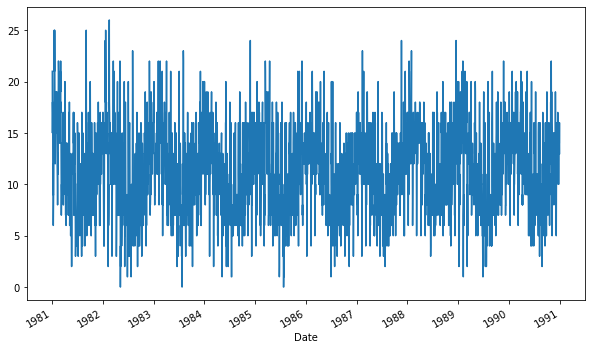

In [ ]:
df['Daily minimum temperatures'].plot(figsize=(10,6))

In [ ]:
df.head()

,Daily minimum temperatures
Date,
1981-01-01,21.0
1981-02-01,18.0
1981-03-01,19.0
1981-04-01,15.0
1981-05-01,16.0


In [ ]:
df.index.min(), df.index.max()

(Timestamp('1981-01-01 00:00:00'), Timestamp('1990-12-31 00:00:00'))

In [ ]:
df.sort_index(inplace=True)

<Figure size 576x432 with 0 Axes>

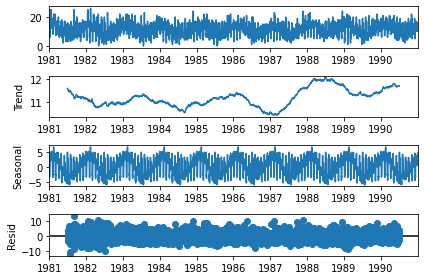

In [ ]:
# Primeiro, vamos decompor a série pra avaliar tendência
# Sazonalidade e resíduo
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(df, model="add",period=365)

fig = plt.figure(figsize=(8, 6))
fig = resultado.plot()

In [ ]:
# Teste de estacionariedade.
# A hipótese nula é que a série não é estacionária
# Ou seja, se o p-valor for menor que 0,05, rejeitamos
# que a série não é estacionária. Caso seja maior, não podemos
# descartar que a série não é estacionária
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Daily minimum temperatures'].dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-3.339747444319624
p-valor:0.013192595054305433


In [ ]:
# Auto ARIMA nos ajuda a buscar os melhores parâmetros
fit_arima = auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=True,
                           m=6,
                           D=1,
                           start_P=1,
                           start_Q=1,
                           max_P=2,
                           max_Q=2,
                           information_criterion='aic',
                           trace=True,
                           error_action='ignore',
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=inf, Time=16.26 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=22243.431, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=20987.996, Time=0.71 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=4.68 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=22092.231, Time=0.14 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=20491.077, Time=1.06 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=10.13 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=5.64 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=20678.596, Time=0.86 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=20426.987, Time=1.78 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=20935.695, Time=1.08 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=19.35 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=9.01 sec
 ARIMA(3,1,0)(2,1,0)[6]             : AIC=20361.477, Time=2.21 sec
 ARIMA(3,1,0)(1,1,0)[6]             : AIC=20882.212,

In [ ]:
# Agora que sabemos os melhores parâmetros, vamos criar um modelo SARIMAX
# (versão do arima com parametros para sazonalidade)

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df,order=(3,1,0))
resultado_sarimax = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# resultados do modelo SARIMAX(3,1,0)
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     Daily minimum temperatures   No. Observations:                 3647
Model:                       SARIMAX(3, 1, 0)   Log Likelihood               -9619.229
Date:                        Wed, 19 Oct 2022   AIC                          19246.457
Time:                                19:53:19   BIC                          19271.263
Sample:                                     0   HQIC                         19255.292
                                       - 3647                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2950      0.015    -19.506      0.000      -0.325      -0.265
ar.L2         -0.1727      0.015    -11.272      0.000      -0.203      -0.143
ar.L3         -0.1207      0.016     -7.622      0.000      -0.152      -0.090
sigma2        11.4575      0.226     50.641      0.000      11.014      11.901
===================================================================================
Ljung-Box (L1) (Q):                   0.75   Jarque-Bera (JB):               106.76
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Vamos realizar um "backtesting" com predições de valores dos 12 meses anteriores
predicoes = resultado_sarimax.get_prediction(start=-60)
predicao_media = predicoes.predicted_mean

In [ ]:
# intervalo de confiança

intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], limites_acima[0]

(13.18006602789296, 26.44863056542449)

In [ ]:
predicao_media[0]

19.814348296658725

In [ ]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

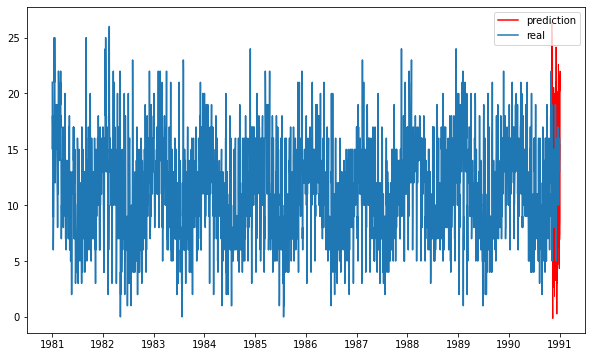

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(datas_previsao,predicao_media.values,color='red',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red')
plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_sarima = sqrt(mean_squared_error(df[-60:].values,predicao_media.values))
print(rmse_sarima)

3.0801017895800102


## Prevendo com XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
treino = df.loc[df.index <= '1988-12-31']
validacao = df.loc[df.index > '1989-01-01']

treino.shape, validacao.shape

((2917, 1), (729, 1))

In [ ]:
treino.index.min(), treino.index.max()

(Timestamp('1981-01-01 00:00:00'), Timestamp('1988-12-30 00:00:00'))

In [ ]:
validacao.index.min(), validacao.index.max()

(Timestamp('1989-01-02 00:00:00'), Timestamp('1990-12-31 00:00:00'))

In [ ]:
treino['Daily minimum temperatures']

Date
1981-01-01    21.0
1981-01-02    15.0
1981-01-03    18.0
1981-01-04    17.0
1981-01-05     9.0
              ... 
1988-12-26    10.0
1988-12-27    13.0
1988-12-28    13.0
1988-12-29    15.0
1988-12-30    14.0
Name: Daily minimum temperatures, Length: 2917, dtype: float64

In [ ]:
treino['Daily minimum temperatures'].shift(-1)

Date
1981-01-01    15.0
1981-01-02    18.0
1981-01-03    17.0
1981-01-04     9.0
1981-01-05    12.0
              ... 
1988-12-26    13.0
1988-12-27    13.0
1988-12-28    15.0
1988-12-29    14.0
1988-12-30     NaN
Name: Daily minimum temperatures, Length: 2917, dtype: float64

In [ ]:
treino['target'] = treino['Daily minimum temperatures'].shift(-1)
treino.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Daily minimum temperatures,target
Date,,
1981-01-01,21.0,15.0
1981-01-02,15.0,18.0
1981-01-03,18.0,17.0
1981-01-04,17.0,9.0
1981-01-05,9.0,12.0


In [ ]:
treino.tail()

,Daily minimum temperatures,target
Date,,
1988-12-26,10.0,13.0
1988-12-27,13.0,13.0
1988-12-28,13.0,15.0
1988-12-29,15.0,14.0
1988-12-30,14.0,NaN


In [ ]:
treino = treino.dropna()
treino.tail()

,Daily minimum temperatures,target
Date,,
1988-12-25,16.0,10.0
1988-12-26,10.0,13.0
1988-12-27,13.0,13.0
1988-12-28,13.0,15.0
1988-12-29,15.0,14.0


In [ ]:
validacao['target'] = validacao['Daily minimum temperatures'].shift(-1)
validacao.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Daily minimum temperatures,target
Date,,
1989-01-02,16.0,20.0
1989-01-03,20.0,13.0
1989-01-04,13.0,14.0
1989-01-05,14.0,2.0
1989-01-06,2.0,6.0


In [ ]:
validacao.tail()

,Daily minimum temperatures,target
Date,,
1990-12-27,14.0,14.0
1990-12-28,14.0,14.0
1990-12-29,14.0,16.0
1990-12-30,16.0,13.0
1990-12-31,13.0,NaN


In [ ]:
validacao = validacao.dropna()
validacao.tail()

,Daily minimum temperatures,target
Date,,
1990-12-26,15.0,14.0
1990-12-27,14.0,14.0
1990-12-28,14.0,14.0
1990-12-29,14.0,16.0
1990-12-30,16.0,13.0


In [ ]:
X_treino = treino.loc[:, ['Daily minimum temperatures']].values
y_treino = treino.loc[:, ['target']].values
X_validacao = validacao.loc[:, ['Daily minimum temperatures']].values
y_validacao = validacao.loc[:, ['target']].values

X_treino.shape, y_treino.shape, X_validacao.shape, y_validacao.shape

((2916, 1), (2916, 1), (728, 1), (728, 1))

In [ ]:
modelo_xgba = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
modelo_xgba.fit(X_treino, y_treino)

XGBRegressor(n_estimators=1000, objective='reg:squarederror')

In [ ]:
validacao.iloc[0]

Daily minimum temperatures    16.0
target                        20.0
Name: 1989-01-02 00:00:00, dtype: float64

In [ ]:
predicao = modelo_xgba.predict(X_validacao)
predicao

array([14.402495 , 15.040559 , 12.444436 , 13.360965 ,  6.687055 ,
        8.299292 ,  7.083378 ,  9.80238  , 10.831615 ,  8.946441 ,
       14.402495 , 11.665335 , 12.444436 , 14.902863 , 16.535097 ,
       14.902863 , 13.360965 , 12.444436 , 14.402495 , 13.556136 ,
       13.556136 , 12.444436 , 12.444436 , 13.556136 , 14.402495 ,
       14.902863 , 15.040559 , 16.363571 , 14.902863 , 14.902863 ,
       14.902863 , 13.360965 , 17.249796 , 13.556136 , 13.556136 ,
        5.4001374,  8.634034 ,  8.946441 ,  9.80238  ,  8.299292 ,
       10.197084 , 15.50876  , 15.50876  , 15.50876  , 16.535097 ,
       16.535097 , 15.040559 , 16.363571 , 14.402495 , 13.556136 ,
       14.402495 , 13.360965 , 12.444436 , 14.402495 , 15.50876  ,
       12.444436 , 14.402495 , 16.535097 , 16.535097 , 14.402495 ,
       15.040559 , 13.360965 , 11.665335 ,  6.687055 , 10.197084 ,
        8.946441 ,  8.299292 ,  7.450583 ,  9.80238  , 13.360965 ,
       12.444436 , 13.556136 , 13.556136 , 13.556136 , 11.6653

In [ ]:
validacao["pred"] = predicao
validacao.head()

,Daily minimum temperatures,target,pred
Date,,,
1989-01-02,16.0,20.0,14.402495
1989-01-03,20.0,13.0,15.040559
1989-01-04,13.0,14.0,12.444436
1989-01-05,14.0,2.0,13.360965
1989-01-06,2.0,6.0,6.687055


In [ ]:
mean_squared_error(X_validacao, predicao)

2.663103052558342